In [93]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
from collections import Counter
from heapq import nlargest

In [94]:
# run in terminal 
# python -m spacy download en_core_web_sm

In [95]:
# Data Cleaning

import re

#sample review from the IMDB dataset.
review = "<b>A touching movie!!</b> It is full of emotions and wonderful acting.<br> I could have sat through it a second time."

cleaned_review = re.sub(re.compile('<.*?>'), '', review) #removing HTML tags
cleaned_review = re.sub('[^A-Za-z0-9]+', ' ', cleaned_review) #taking only words

print(cleaned_review)

A touching movie It is full of emotions and wonderful acting I could have sat through it a second time 


In [96]:
#Lowercase

cleaned_review = cleaned_review.lower()

print(cleaned_review)

a touching movie it is full of emotions and wonderful acting i could have sat through it a second time 


# Basic NLP

In [97]:
# Tokenization

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/abdulwahabmac/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [98]:


from nltk.tokenize import word_tokenize

tokens = nltk.word_tokenize(cleaned_review)

print(cleaned_review)
print(tokens)

a touching movie it is full of emotions and wonderful acting i could have sat through it a second time 
['a', 'touching', 'movie', 'it', 'is', 'full', 'of', 'emotions', 'and', 'wonderful', 'acting', 'i', 'could', 'have', 'sat', 'through', 'it', 'a', 'second', 'time']


In [99]:
# Stop words removal

nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abdulwahabmac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [100]:


stop_words = stopwords.words('english')

filtered_review = [word for word in tokens if word not in stop_words] # removing stop words

print(filtered_review)

['touching', 'movie', 'full', 'emotions', 'wonderful', 'acting', 'could', 'sat', 'second', 'time']


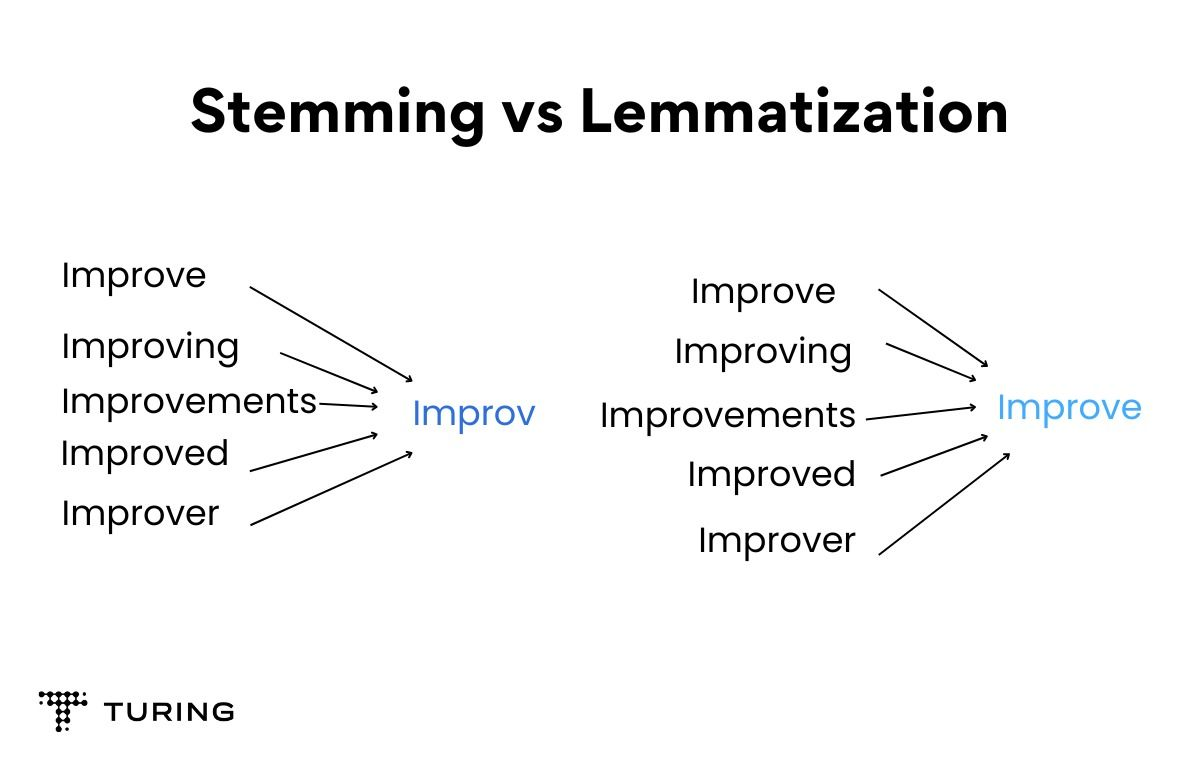

In [101]:
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/abdulwahabmac/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/abdulwahabmac/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [102]:


lemmatizer = WordNetLemmatizer()

lemm_review = [lemmatizer.lemmatize(word) for word in filtered_review]

print(lemm_review)

['touching', 'movie', 'full', 'emotion', 'wonderful', 'acting', 'could', 'sat', 'second', 'time']


In [103]:
from nltk import word_tokenize, pos_tag
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/abdulwahabmac/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [104]:

text = "I am learning Natural Language Processing on Analytics Vidhya"
tokens = word_tokenize(text)
print (pos_tag(tokens))

[('I', 'PRP'), ('am', 'VBP'), ('learning', 'VBG'), ('Natural', 'NNP'), ('Language', 'NNP'), ('Processing', 'NNP'), ('on', 'IN'), ('Analytics', 'NNP'), ('Vidhya', 'NNP')]


# Spacy

In [29]:
import os
import spacy
nlp = spacy.load("en_core_web_sm")
from spacy import displacy

In [30]:
print(nlp.pipe_names)

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


In [31]:
print(nlp.pipeline)

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec object at 0x2833618a0>), ('tagger', <spacy.pipeline.tagger.Tagger object at 0x16d1b0760>), ('parser', <spacy.pipeline.dep_parser.DependencyParser object at 0x281134890>), ('attribute_ruler', <spacy.pipeline.attributeruler.AttributeRuler object at 0x2833fae40>), ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer object at 0x283584d00>), ('ner', <spacy.pipeline.ner.EntityRecognizer object at 0x281134ac0>)]


In [32]:
text = """Looking for a hotel in New York near Times Square with free breakfast and cheaper
than $100 for 2nd June which is really kids friendly and has a swimming pool and I want to stay there for 8 days"""
doc = nlp(text)
sentence_spans = list(doc.sents)
displacy.render(doc, jupyter = True, style="ent")

In [33]:
text = """Close to the Effiel Tower and is very high end with great shopping nearby"""
doc = nlp(text)
sentence_spans = list(doc.sents)
displacy.render(doc, jupyter = True, style="ent")

In [34]:
text = "I want to stay in a European city that filmed Game of Thrones and has very cheap booze and art galleries for 4 days"

In [35]:
#text = """My very photogenic mother died in a freak accident (picnic, lightning) when I was three, and, save for a pocket of warmth in the darkest past, nothing of her subsists within the hollows and dells of memory, over which, if you can still stand my style (I am writing under observation), the sun of my infancy had set: surely, you all know those redolent remnants of day suspended, with the midges, about some hedge in bloom or suddenly entered and traversed by the rambler, at the bottom of a hill, in the summer dusk; a furry warmth, golden midges"""
doc = nlp(text)
sentence_spans = list(doc.sents)
displacy.render(doc, jupyter = True, style="ent")

In [36]:
spacy.explain("GPE")

'Countries, cities, states'

In [37]:
spacy.explain("NORP")

'Nationalities or religious or political groups'

In [38]:
spacy.explain("ORG")

'Companies, agencies, institutions, etc.'

In [39]:
spacy.explain("FAC")

'Buildings, airports, highways, bridges, etc.'

In [40]:
from spacy import displacy
text = ("Natural Language Processing provides computers the capability of understanding text")
text_doc_object = nlp(text)
displacy.render(text_doc_object, style='dep',jupyter = True)

In [42]:
text = ('''Physics is a fundamental branch of science that seeks to understand the fundamental principles that govern the behavior of the universe. It encompasses a broad range of phenomena, from the smallest subatomic particles to the largest structures in the universe, such as galaxies and black holes.

The study of physics is based on a few fundamental concepts, such as space, time, mass, energy, and force. These concepts provide a framework for understanding the behavior of physical systems and the interactions between them.

One of the key achievements of physics is the development of a set of mathematical equations that describe the behavior of physical systems. These equations allow physicists to make predictions about the behavior of a system and test those predictions through experimentation.

One of the most important concepts in physics is the theory of relativity, which was developed by Albert Einstein in the early 20th century. The theory of relativity explains how the laws of physics are the same for all observers in all inertial frames of reference, regardless of their relative motion. It also explains the nature of gravity as a curvature of spacetime caused by the presence of mass and energy.

Another important area of physics is quantum mechanics, which deals with the behavior of particles on a very small scale, such as atoms and subatomic particles. Quantum mechanics is based on the idea that particles can exist in multiple states at the same time, and that the act of measurement can cause a particle to collapse into a single state. This leads to some strange and counterintuitive phenomena, such as entanglement, where the properties of one particle can affect the properties of another particle instantaneously over vast distances.

Physics has many practical applications in areas such as engineering, technology, and medicine. For example, the principles of physics are used in the design of bridges, buildings, and other structures, as well as in the development of new technologies such as semiconductors and lasers. In medicine, physics is used in the development of imaging technologies such as X-rays, MRI, and CT scans, as well as in the development of radiation therapy for cancer treatment.

In conclusion, physics is a fundamental branch of science that seeks to understand the behavior of the universe through the study of fundamental concepts such as space, time, mass, energy, and force. Its achievements have led to a deeper understanding of the universe and have practical applications that benefit society in many ways.''')
text_doc_object = nlp(text)
from collections import Counter
words = [token.text for token in text_doc_object if not token.is_punct and not  token.is_stop and not token.is_space]
word_freq = Counter(words)
common_words = word_freq.most_common(30)
first=[]
second=[]
for i in common_words:
    first.append(i[0])
    second.append(i[1])

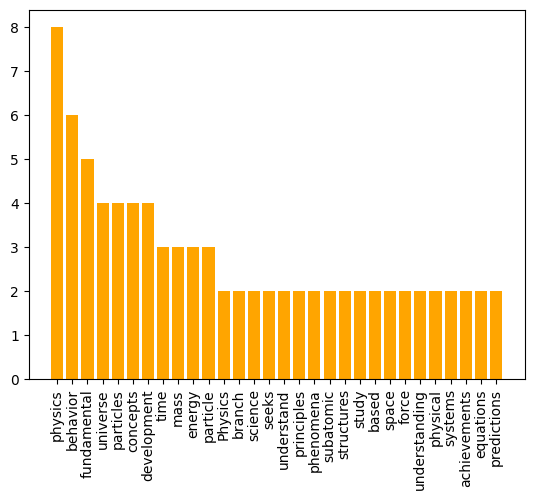

In [55]:

import matplotlib.pyplot as plt
plt.bar(first, second,  color='orange')
plt.xticks(range(len(first)), first, rotation='vertical')
plt.show()

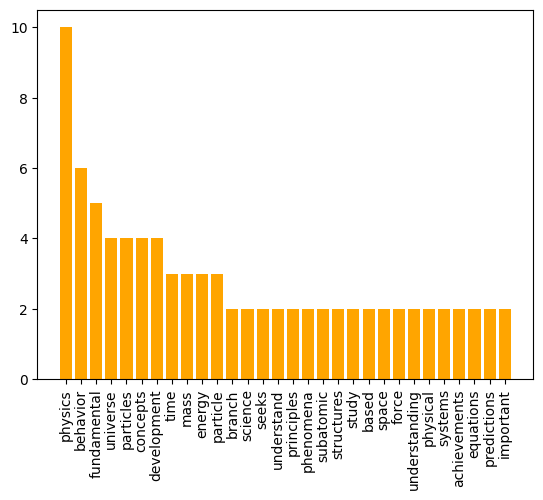

In [56]:
text_doc_object = nlp(text.lower())
from collections import Counter
words = [token.text for token in text_doc_object if not token.is_punct and not  token.is_stop and not token.is_space]
word_freq = Counter(words)
common_words = word_freq.most_common(30)
first=[]
second=[]
for i in common_words:
    first.append(i[0])
    second.append(i[1])
import matplotlib.pyplot as plt
plt.bar(first, second,  color='orange')
plt.xticks(range(len(first)), first, rotation='vertical')
plt.show()

In [57]:
# Create the nlp object
nlp = spacy.load("en_core_web_sm")
from spacy.language import Language

# Define a custom component
@Language.component("custom_component")
def custom_component_function(doc):
    # Print the doc's length
    print("Your Doc length:", len(doc))
    # Return the doc object
    return doc

# Add the component first in the pipeline
nlp.add_pipe("custom_component", first=True)

# Print the pipeline component names
print("Pipeline:", nlp.pipe_names)

Pipeline: ['custom_component', 'tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


In [58]:
text = ("Natural Language Processing provides computers the capability of understanding text")
text_doc_object = nlp(text)

Your Doc length: 10


In [67]:
stopwords=list(STOP_WORDS)
from string import punctuation
punctuation=punctuation+ '\n'

In [70]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~\n'

In [ ]:
# run in terminal 
# python -m spacy download en_core_web_md

In [74]:
# Compare two documents
doc1 = nlp("I like fast food")
doc2 = nlp("I like pizza")
print(doc1.similarity(doc2))

Your Doc length: 4
Your Doc length: 3
0.7441097933446184


/var/folders/hq/scvbwj_55y366k5jlzy80rx40000gn/T/ipykernel_99793/26917258.py:4: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  print(doc1.similarity(doc2))


In [92]:
nlp = spacy.load("en_core_web_md")

# Compare two documents
doc1 = nlp("I like fast food")
doc2 = nlp("I like pizza")
print(doc1.similarity(doc2))

# Compare two documents
doc1 = nlp("I adore fast food")
doc2 = nlp("I love pizza")
print(doc1.similarity(doc2))

0.869833325851152
0.8407544923971807
